### Paso 1: Planteamiento del Problema y Recopilación de Datos
#### Pipeline de machine Learning para AirBnB

In [1]:
# Importar las librerías requeridas
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Extraer los datos para el analisis exploratorio (AirBnB New York City)
df_airbnb_ny = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df_airbnb_ny

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### Paso 2: Exploración y Limpieza de Datos

In [3]:
# Obtener las dimensiones
df_airbnb_ny.shape

(48895, 16)

Podemos observar que el dataframe tiene 16 columnas y 48895 filas

In [4]:
# Obtener información sobre tipos de datos y valores no nulos
df_airbnb_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

En el dataframe existen variables con valores perdido, entre ellos "name", "host_name", "last_review" y "reviews_per_month".

In [5]:
# Obtener valores duplicados
df_airbnb_ny.duplicated().sum()

0

In [6]:
# Encontrar valores unicos
df_airbnb_ny.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [7]:
# Obtener valores nulos
df_airbnb_ny.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
# Porcentaje de valores nulos
df_airbnb_ny.isnull().sum()/len(df_airbnb_ny)*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [8]:
# Remover columnas que no aportan valor
df_airbnb_ny.drop(['id','name','last_review'], axis=1, inplace=True)

In [9]:
# dataframe con las columnas removidas
df_airbnb_ny.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### Paso 3: Resumen Estadístico

In [10]:
# Analisis de las variables categoricas
df_airbnb_ny.describe(include=['O']).T

,count,unique,top,freq
host_name,48874,11452,Michael,417
neighbourhood_group,48895,5,Manhattan,21661
neighbourhood,48895,221,Williamsburg,3920
room_type,48895,3,Entire home/apt,25409


In [11]:
# Analisis de las variables numericas
df_airbnb_ny.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [12]:
# Analisis de todas las variables
df_airbnb_ny.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
host_id,48895.0,NaN,NaN,NaN,67620010.64661,78610967.032667,2438.0,7822033.0,30793816.0,107434423.0,274321313.0
host_name,48874,11452,Michael,417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,48895,5,Manhattan,21661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,48895,221,Williamsburg,3920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,48895.0,NaN,NaN,NaN,40.728949,0.05453,40.49979,40.6901,40.72307,40.763115,40.91306
longitude,48895.0,NaN,NaN,NaN,-73.95217,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
room_type,48895,3,Entire home/apt,25409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,48895.0,NaN,NaN,NaN,152.720687,240.15417,0.0,69.0,106.0,175.0,10000.0
minimum_nights,48895.0,NaN,NaN,NaN,7.029962,20.51055,1.0,1.0,3.0,5.0,1250.0
number_of_reviews,48895.0,NaN,NaN,NaN,23.274466,44.550582,0.0,1.0,5.0,24.0,629.0


### Paso 3: Analísis de variable univariantes

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

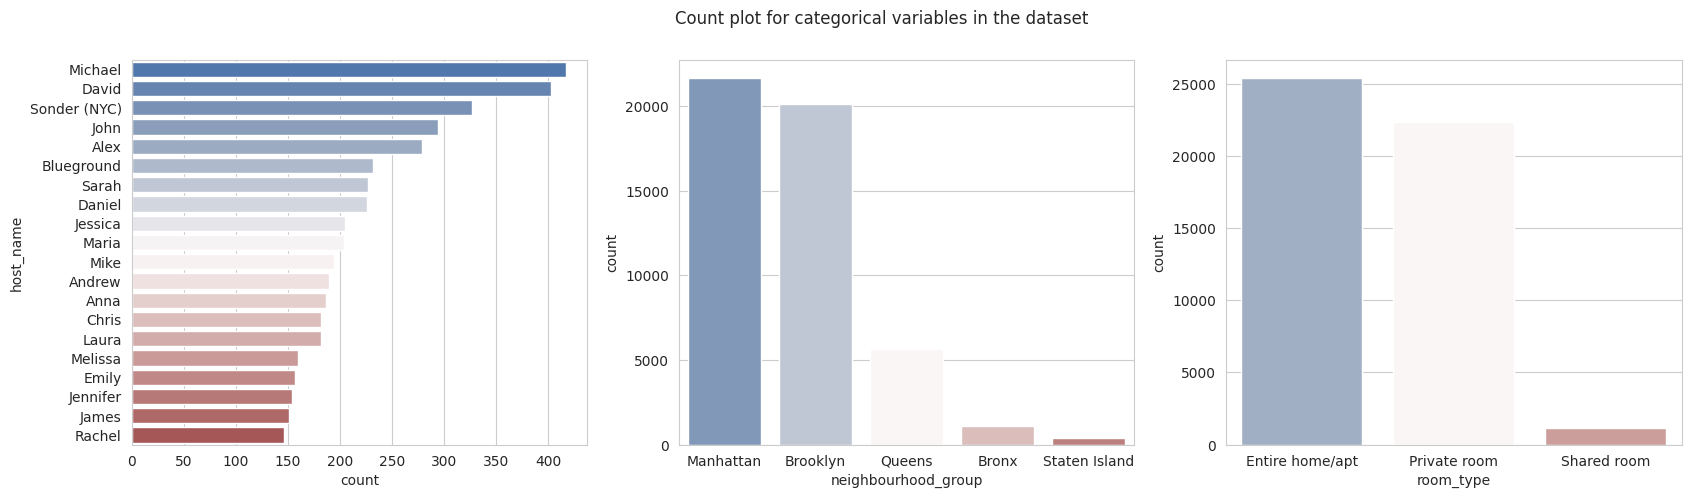

In [44]:
# Analisis de las variables categoricas
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Count plot for categorical variables in the dataset')
sns.set_style(style = 'whitegrid')
sns.countplot(ax = axes[0], y = 'host_name', data = df_airbnb_ny, palette = "vlag", order = df_airbnb_ny['host_name'].value_counts().iloc[:20].index)
sns.countplot(ax = axes[1], x = 'neighbourhood_group', data=df_airbnb_ny, palette = "vlag", order=df_airbnb_ny['neighbourhood_group'].value_counts().index)
sns.countplot(ax = axes[2], x = 'room_type', data=df_airbnb_ny, palette = "vlag", order=df_airbnb_ny['room_type'].value_counts().index)

plt.show()

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and wil

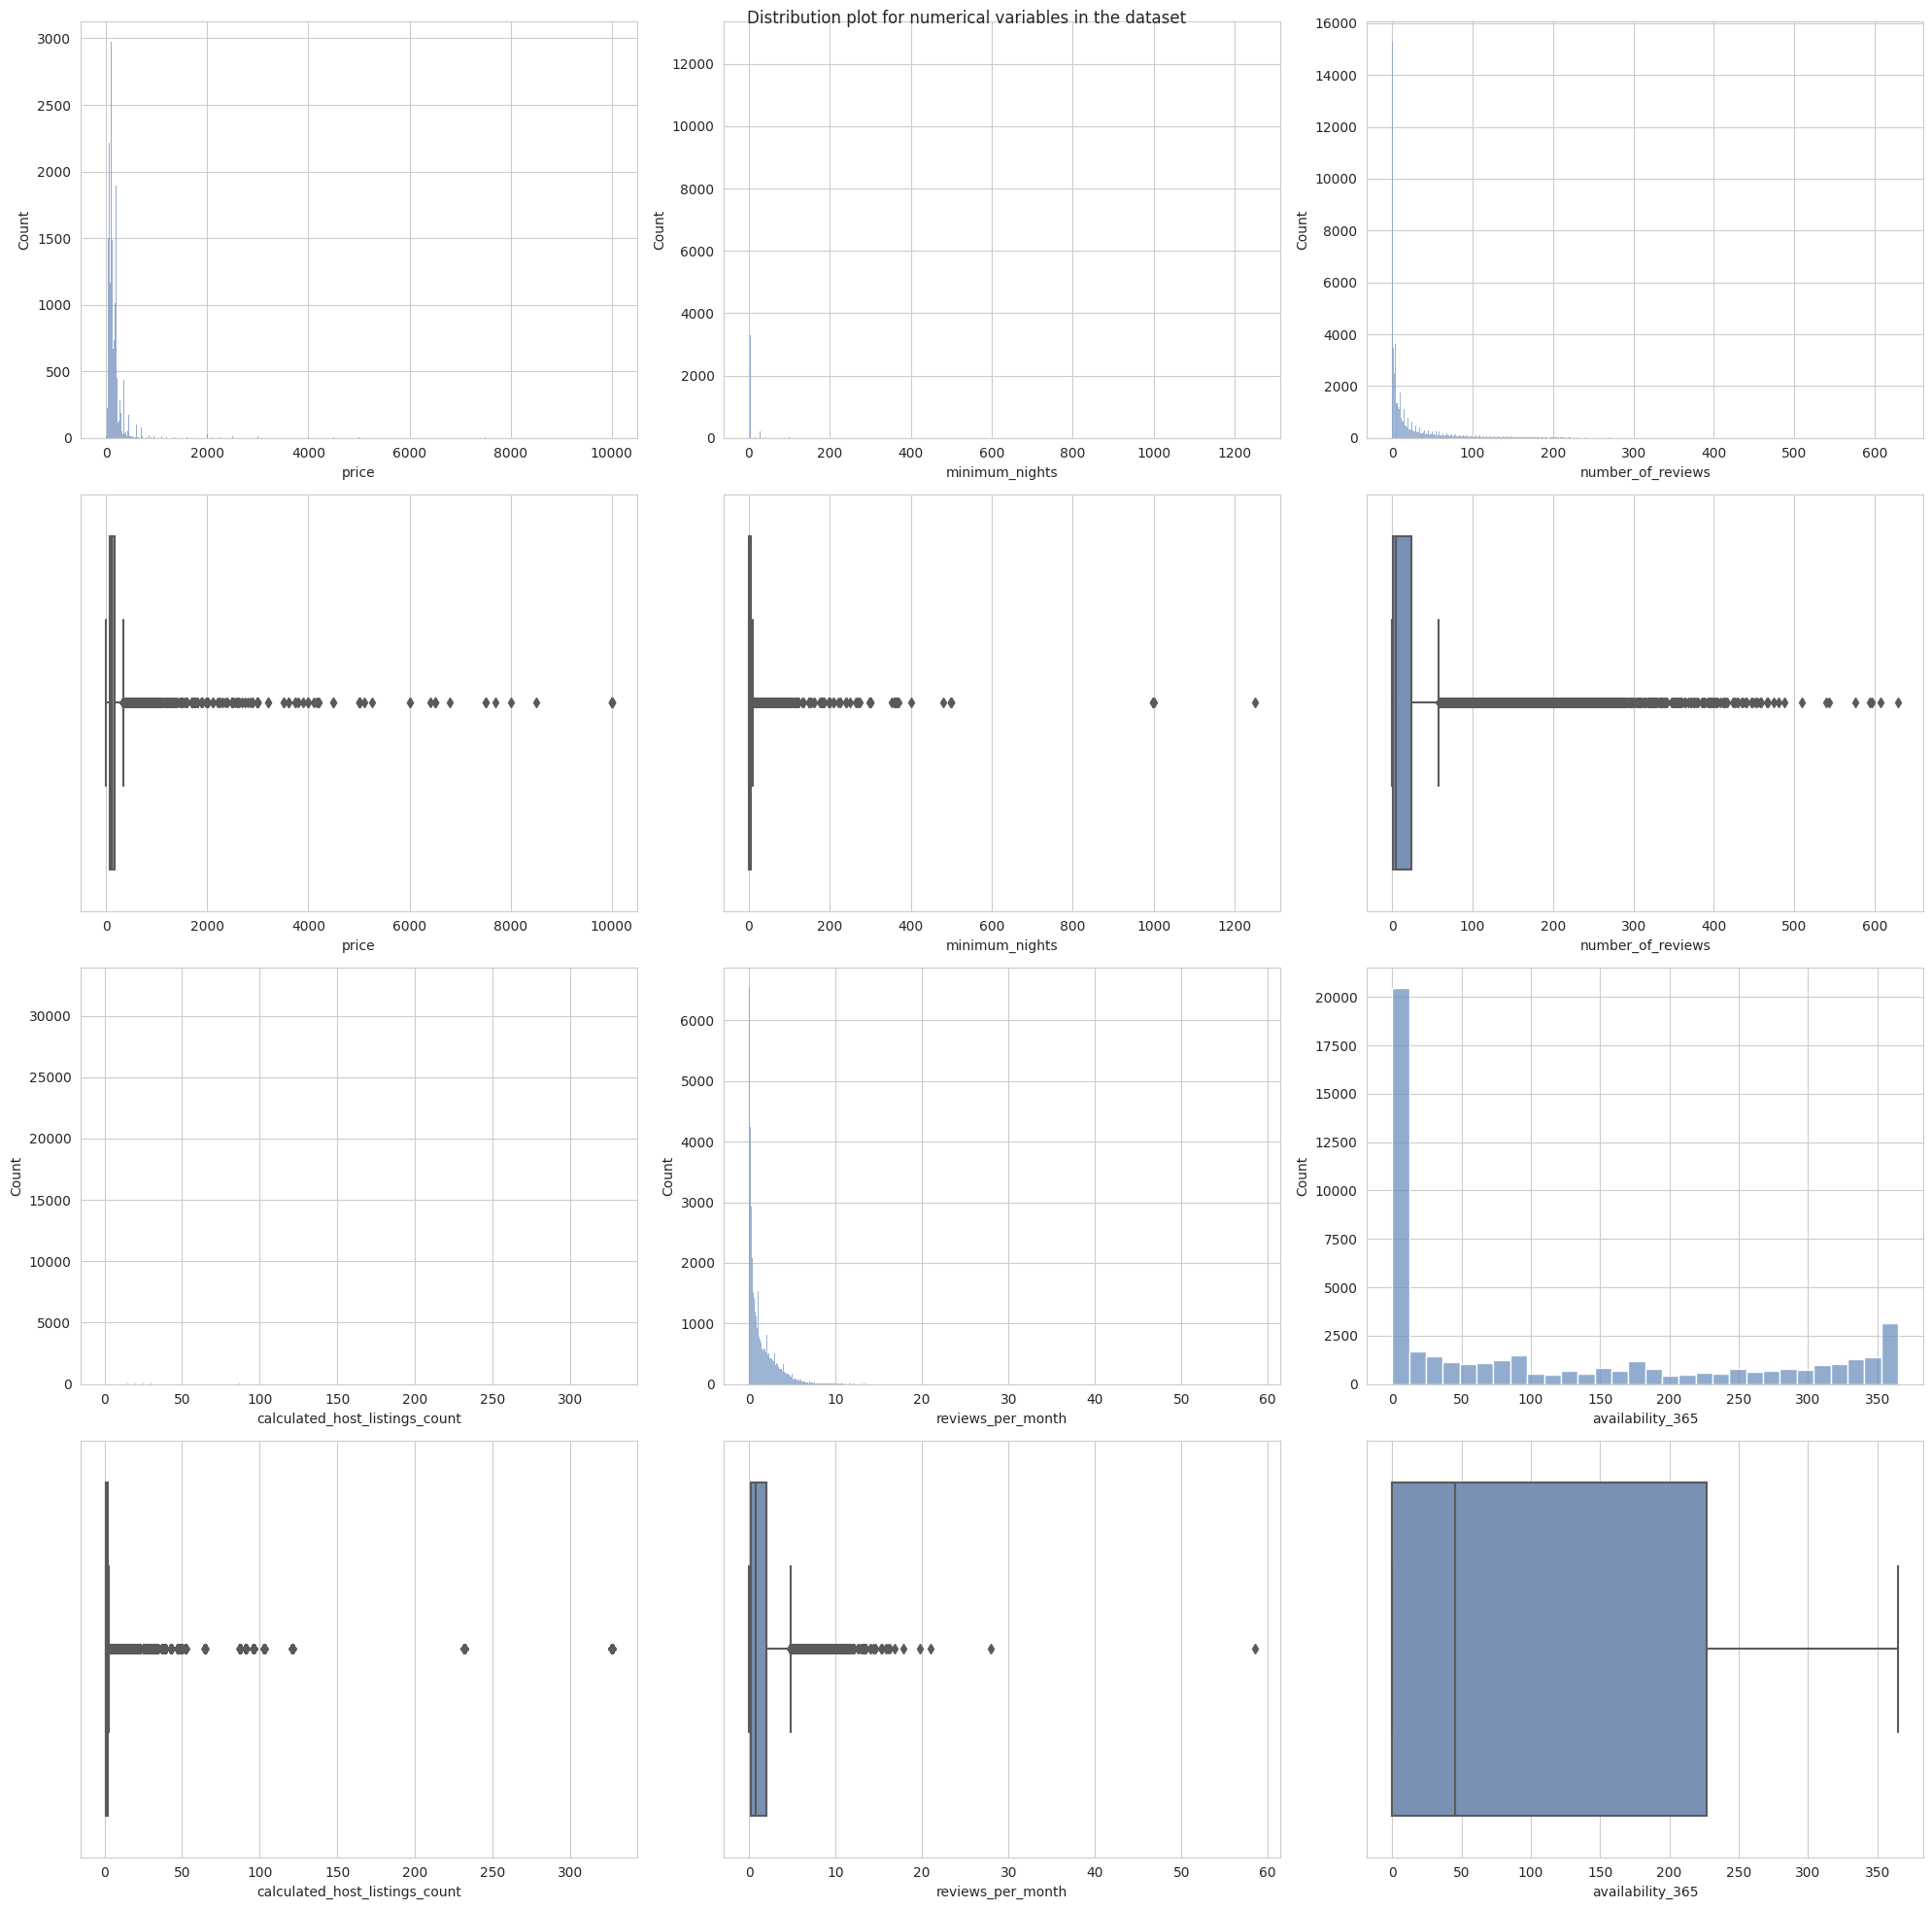

In [54]:
#Analisis de variables numéricas
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
fig.suptitle('Distribution plot for numerical variables in the dataset')
sns.set_style(style = 'whitegrid')
sns.set_palette("vlag")
sns.histplot(ax = axes[0,0], x = 'price', data = df_airbnb_ny)
sns.boxplot(ax = axes[1,0], x = 'price', data = df_airbnb_ny)
sns.histplot(ax = axes[0,1], x = 'minimum_nights', data=df_airbnb_ny)
sns.boxplot(ax = axes[1,1], x = 'minimum_nights', data=df_airbnb_ny)
sns.histplot(ax = axes[0,2], x = 'number_of_reviews', data=df_airbnb_ny)
sns.boxplot(ax = axes[1,2], x = 'number_of_reviews', data=df_airbnb_ny)
sns.histplot(ax = axes[2,0], x = 'calculated_host_listings_count', data=df_airbnb_ny)
sns.boxplot(ax = axes[3,0], x = 'calculated_host_listings_count', data=df_airbnb_ny)
sns.histplot(ax = axes[2,1], x = 'reviews_per_month', data=df_airbnb_ny)
sns.boxplot(ax = axes[3,1], x = 'reviews_per_month', data=df_airbnb_ny)
sns.histplot(ax = axes[2,2], x = 'availability_365', data=df_airbnb_ny)
sns.boxplot(ax = axes[3,2], x = 'availability_365', data=df_airbnb_ny)

# Ajustar el layout
plt.tight_layout()

plt.show()